1. Загрузка данных банковского кейса

In [42]:
import pandas as pd
import seaborn as sns  # Импортируем библиотеку Seaborn
import matplotlib.pyplot as plt  # Импортируем Matplotlib для визуализации

# Указываем палитру
sns.set_palette("Greens")

# Загружаем данные из CSV-файла
bnk_df = pd.read_csv('/content/drive/MyDrive/PN14/bank_clients_transactions.csv')

# Просмотр первых нескольких строк данных (опционально)
# print(bnk_df.head())


In [43]:
bnk_df.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')

Переименование TransactionAmount (INR) на TransactionAmount


In [44]:
# Удаление лишних пробелов из названий столбцов
bnk_df.columns = bnk_df.columns.str.strip()

# Переименование столбца
bnk_df.rename(columns={'TransactionAmount (INR)': 'TransactionAmount'}, inplace=True)

# Проверка, что столбец был успешно переименован
print(bnk_df.columns)

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount'],
      dtype='object')


In [45]:
bnk_df.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount'],
      dtype='object')

Выводы:     
1. Загрузили до 1048567 строк данных.
2. Но по некоторым столбцам есть пропуски в данных.
3. Данные в CustomerDOB	и CustAccountBalance имеют короткий символьный формат данных даты.
4. TransactionTime представлен в миллисекундах.

In [46]:
bnk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   TransactionID       1048567 non-null  object 
 1   CustomerID          1048567 non-null  object 
 2   CustomerDOB         1045170 non-null  object 
 3   CustGender          1047467 non-null  object 
 4   CustLocation        1048416 non-null  object 
 5   CustAccountBalance  1046198 non-null  float64
 6   TransactionDate     1048567 non-null  object 
 7   TransactionTime     1048567 non-null  int64  
 8   TransactionAmount   1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


1. Столбцы данных привели к camel case.

In [47]:
import pandas as pd

# bnk_df = pd.DataFrame(data) # Данные уже загружены

# Функция для преобразования в camel case
def to_camel_case(s):
    s = s.replace(' ', '')  # Убираем пробелы
    return ''.join(word.capitalize() if i != 0 else word.lower() for i, word in enumerate(s.split('_')))

# Применяем функцию ко всем столбцам
bnk_df.columns = [to_camel_case(col) for col in bnk_df.columns]

# Выводим измененный DataFrame
print(bnk_df.columns)

Index(['transactionid', 'customerid', 'customerdob', 'custgender',
       'custlocation', 'custaccountbalance', 'transactiondate',
       'transactiontime', 'transactionamount'],
      dtype='object')


In [48]:
bnk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   transactionid       1048567 non-null  object 
 1   customerid          1048567 non-null  object 
 2   customerdob         1045170 non-null  object 
 3   custgender          1047467 non-null  object 
 4   custlocation        1048416 non-null  object 
 5   custaccountbalance  1046198 non-null  float64
 6   transactiondate     1048567 non-null  object 
 7   transactiontime     1048567 non-null  int64  
 8   transactionamount   1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


2. Привести типы данных —> данные даты должны быть в формате datetime

In [49]:
import pandas as pd
from datetime import datetime, timedelta

# Пример создания датафрейма (замените это на ваш загрузчик данных)
# bnk_df = pd.read_csv('your_data_file.csv')  # Загрузите ваши данные

# Запомнить текущую дату
current_date = datetime.now()

# Преобразуем столбец customerdob в формат datetime с обработкой ошибок
bnk_df['customerdob'] = pd.to_datetime(bnk_df['customerdob'], format='%d/%m/%y', errors='coerce')

# Корректировка значений в customerdob
# Корректировка значений Года в Дате рождения клиента в customerdob       ***
bnk_df['customerdob'] = bnk_df['customerdob'].apply(
    lambda dob: dob - timedelta(days=36525) if dob > current_date else dob
)

# Преобразуем столбец transactiondate в формат datetime с обработкой ошибок
bnk_df['transactiondate'] = pd.to_datetime(bnk_df['transactiondate'], format='%d/%m/%y', errors='coerce')

# Переводим столбец transactiontime из миллисекунд в timedelta
bnk_df['transactiontime'] = pd.to_timedelta(bnk_df['transactiontime'], unit='ms')

# Проверка результата
print(bnk_df.head())

  transactionid customerid customerdob custgender custlocation  \
0            T1   C5841053  1994-01-10          F   JAMSHEDPUR   
1            T2   C2142763  1957-04-04          M      JHAJJAR   
2            T3   C4417068  1996-11-26          F       MUMBAI   
3            T4   C5342380  1973-09-14          F       MUMBAI   
4            T5   C9031234  1988-03-24          F  NAVI MUMBAI   

   custaccountbalance transactiondate        transactiontime  \
0            17819.05      2016-08-02 0 days 00:02:23.207000   
1             2270.69      2016-08-02 0 days 00:02:21.858000   
2            17874.44      2016-08-02 0 days 00:02:22.712000   
3           866503.21      2016-08-02 0 days 00:02:22.714000   
4             6714.43      2016-08-02 0 days 00:03:01.156000   

   transactionamount  
0               25.0  
1            27999.0  
2              459.0  
3             2060.0  
4             1762.5  


Выводы:     
1. Данные в customerdob	и custAccountbalance приведены в формат данных datetime.
2. transactiontime преобразован в формат минуты:секунды.
3. Дата рождения клиента подкорректирована.

In [50]:
bnk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype          
---  ------              --------------    -----          
 0   transactionid       1048567 non-null  object         
 1   customerid          1048567 non-null  object         
 2   customerdob         987831 non-null   datetime64[ns] 
 3   custgender          1047467 non-null  object         
 4   custlocation        1048416 non-null  object         
 5   custaccountbalance  1046198 non-null  float64        
 6   transactiondate     1048567 non-null  datetime64[ns] 
 7   transactiontime     1048567 non-null  timedelta64[ns]
 8   transactionamount   1048567 non-null  float64        
dtypes: datetime64[ns](2), float64(2), object(4), timedelta64[ns](1)
memory usage: 72.0+ MB


In [51]:
bnk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype          
---  ------              --------------    -----          
 0   transactionid       1048567 non-null  object         
 1   customerid          1048567 non-null  object         
 2   customerdob         987831 non-null   datetime64[ns] 
 3   custgender          1047467 non-null  object         
 4   custlocation        1048416 non-null  object         
 5   custaccountbalance  1046198 non-null  float64        
 6   transactiondate     1048567 non-null  datetime64[ns] 
 7   transactiontime     1048567 non-null  timedelta64[ns]
 8   transactionamount   1048567 non-null  float64        
dtypes: datetime64[ns](2), float64(2), object(4), timedelta64[ns](1)
memory usage: 72.0+ MB


3. Найти и удалить дубли и пропуски в данных

In [52]:
bnk_df.count()

,0
transactionid,1048567
customerid,1048567
customerdob,987831
custgender,1047467
custlocation,1048416
custaccountbalance,1046198
transactiondate,1048567
transactiontime,1048567
transactionamount,1048567


In [53]:
import pandas as pd

# Предполагаем, что bnk_df уже загружен и содержит данные

# Выводим исходный датафрейм для наглядности
#print("Исходный датафрейм:")
#print(bnk_df)

# Проверяем количество дубликатов в датафрейме
duplicates_count = bnk_df.duplicated().sum()
print(f"\nКоличество дубликатов: {duplicates_count}")

# Удаляем дубликаты
bnk_df = bnk_df.drop_duplicates()

# Проверяем количество пропусков в каждом столбце
missing_values_count = bnk_df.isnull().sum()
print("\nКоличество пропусков в каждом столбце:")
print(missing_values_count)

# Удаляем строки с пропусками
bnk_df = bnk_df.dropna()

# Выводим очищенный датафрейм и его информацию
print("\nОчищенный датафрейм:")
print(bnk_df)
print("\nИнформация о очищенном датафрейме:")
#print(bnk_df.info())
print(bnk_df.count())


Количество дубликатов: 0

Количество пропусков в каждом столбце:
transactionid             0
customerid                0
customerdob           60736
custgender             1100
custlocation            151
custaccountbalance     2369
transactiondate           0
transactiontime           0
transactionamount         0
dtype: int64

Очищенный датафрейм:
        transactionid customerid customerdob custgender   custlocation  \
0                  T1   C5841053  1994-01-10          F     JAMSHEDPUR   
1                  T2   C2142763  1957-04-04          M        JHAJJAR   
2                  T3   C4417068  1996-11-26          F         MUMBAI   
3                  T4   C5342380  1973-09-14          F         MUMBAI   
4                  T5   C9031234  1988-03-24          F    NAVI MUMBAI   
...               ...        ...         ...        ...            ...   
1048562      T1048563   C8020229  1990-04-08          M      NEW DELHI   
1048563      T1048564   C6459278  1992-02-20          M

In [54]:
import pandas as pd                                 #  Удаление строк с ==0

# Предполагаем, что bnk_df уже загружен и содержит необходимые столбцы

# Сохраним исходное количество строк
initial_count = len(bnk_df)

# 1. Удаление строк с нулевыми значениями в столбце custaccountbalance
removed_custbalance = bnk_df[bnk_df['custaccountbalance'] == 0]
bnk_df = bnk_df[bnk_df['custaccountbalance'] != 0]

# 2. Подсчет количества удаленных строк по столбцу custaccountbalance
count_removed_custbalance = len(removed_custbalance)

# 3. Удаление строк с нулевыми значениями в столбце transactionamount
removed_transactionamount = bnk_df[bnk_df['transactionamount'] == 0]
bnk_df = bnk_df[bnk_df['transactionamount'] != 0]

# 4. Подсчет количества удаленных строк по столбцу transactionamount
count_removed_transactionamount = len(removed_transactionamount)

# 5. Показываем количество удаленных строк по полю custaccountbalance
print(f"Количество удаленных строк по полю custaccountbalance: {count_removed_custbalance}")

# 6. Показываем количество удаленных строк по полю transactionamount
print(f"Количество удаленных строк по полю transactionamount: {count_removed_transactionamount}")

# 7. Показываем количество "было" строк в bnk_df
print(f"Количество строк 'было': {initial_count}")

# 8. Показываем количество "стало" строк в bnk_df
final_count = len(bnk_df)
print(f"Количество строк 'стало': {final_count}")

# Для просмотра финального DataFrame
print(bnk_df)

Количество удаленных строк по полю custaccountbalance: 2106
Количество удаленных строк по полю transactionamount: 705
Количество строк 'было': 985322
Количество строк 'стало': 982511
        transactionid customerid customerdob custgender   custlocation  \
0                  T1   C5841053  1994-01-10          F     JAMSHEDPUR   
1                  T2   C2142763  1957-04-04          M        JHAJJAR   
2                  T3   C4417068  1996-11-26          F         MUMBAI   
3                  T4   C5342380  1973-09-14          F         MUMBAI   
4                  T5   C9031234  1988-03-24          F    NAVI MUMBAI   
...               ...        ...         ...        ...            ...   
1048562      T1048563   C8020229  1990-04-08          M      NEW DELHI   
1048563      T1048564   C6459278  1992-02-20          M         NASHIK   
1048564      T1048565   C6412354  1989-05-18          M      HYDERABAD   
1048565      T1048566   C6420483  1978-08-30          M  VISAKHAPATNAM   
104

3.1 Визуализация всплесков или выбросов  для всех столбцов датафрейма.

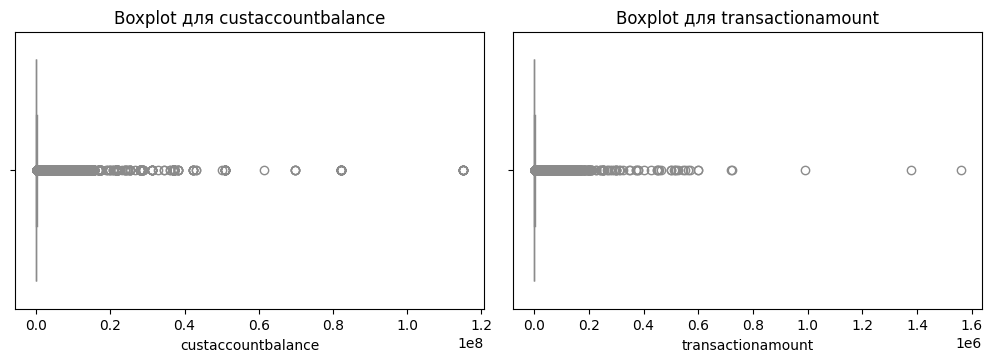

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, что bnk_df уже загружен

# Установим размер графиков
plt.figure(figsize=(15, 10))

# Перебираем все числовые столбцы и создаём ящики с усами
for idx, col in enumerate(bnk_df.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(3, 3, idx + 1)  # Создаём сетку под графики
    sns.boxplot(x=bnk_df[col])
    plt.title(f'Boxplot для {col}')
    plt.xlabel(col)

plt.tight_layout()  # Чтобы избежать наложения графиков
plt.show()

In [56]:
bnk_df.count()

,0
transactionid,982511
customerid,982511
customerdob,982511
custgender,982511
custlocation,982511
custaccountbalance,982511
transactiondate,982511
transactiontime,982511
transactionamount,982511


3.2. Удаление методом межквартильного размаха (IQR) для всех столбцов датафрейма.

In [57]:
import pandas as pd

# Предположим, что bnk_df уже загружен

# Функция для удаления выбросов на основе IQR
def remove_outliers_iqr(df):
    # Копируем датафрейм, чтобы не изменять оригинал
    df_cleaned = df.copy()

    # Применяем IQR для всех числовых столбцов
    for col in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1

        # Определяем нижнюю и верхнюю границы
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Удаляем выбросы
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

    return df_cleaned

# Применяем функцию к bnk_df и сохраняем очищенный результат в новое состояние
bnk_df_cleaned = remove_outliers_iqr(bnk_df)

# Проверяем количество строк в очищенном DataFrame
print("Количество строк в очищенном DataFrame:", bnk_df_cleaned.shape[0])

# Проверяем количество строк в оригинальном DataFrame
print("Количество строк в оригинальном DataFrame:", bnk_df.shape[0])

# Проверяем количество ненулевых значений в очищенном DataFrame
print("\nКоличество ненулевых значений в очищенном DataFrame:\n", bnk_df_cleaned.notnull().sum())
bnk_df = bnk_df_cleaned                          # +++  # ПЕРЕПРИСВОИЛИ

Количество строк в очищенном DataFrame: 762921
Количество строк в оригинальном DataFrame: 982511

Количество ненулевых значений в очищенном DataFrame:
 transactionid         762921
customerid            762921
customerdob           762921
custgender            762921
custlocation          762921
custaccountbalance    762921
transactiondate       762921
transactiontime       762921
transactionamount     762921
dtype: int64


In [58]:
bnk_df.notnull().sum()

,0
transactionid,762921
customerid,762921
customerdob,762921
custgender,762921
custlocation,762921
custaccountbalance,762921
transactiondate,762921
transactiontime,762921
transactionamount,762921


In [59]:
bnk_df.count()

,0
transactionid,762921
customerid,762921
customerdob,762921
custgender,762921
custlocation,762921
custaccountbalance,762921
transactiondate,762921
transactiontime,762921
transactionamount,762921


In [60]:
bnk_df.count()

,0
transactionid,762921
customerid,762921
customerdob,762921
custgender,762921
custlocation,762921
custaccountbalance,762921
transactiondate,762921
transactiontime,762921
transactionamount,762921


Проверка готовности данных для аналитики

In [61]:
bnk_df.count()

,0
transactionid,762921
customerid,762921
customerdob,762921
custgender,762921
custlocation,762921
custaccountbalance,762921
transactiondate,762921
transactiontime,762921
transactionamount,762921


In [62]:
import pandas as pd

# Предположим, что bnk_df уже загружен

# Проверка первых нескольких строк DataFrame
print("Первые 5 строк DataFrame:")
print(bnk_df.head())

# Проверка информации о DataFrame (типы данных и количество ненулевых значений)
print("\nИнформация о DataFrame:")
print(bnk_df.info())

# Проверка описательной статистики для числовых столбцов
print("\nОписательная статистика:")
print(bnk_df.describe())

# Проверка на наличие дубликатов
duplicate_count = bnk_df.duplicated().sum()
print("\nКоличество дубликатов в DataFrame:", duplicate_count)

# Проверка на наличие пропущенных значений
missing_values = bnk_df.isnull().sum()
print("\nКоличество пропущенных значений в каждом столбце:")
print(missing_values[missing_values > 0])  # Показываем только столбцы с пропущенными значениями

# Проверка уникальных значений в каждом столбце
print("\nКоличество уникальных значений в каждом столбце:")
print(bnk_df.nunique())

# Проверка, есть ли аномальные значения (например, отрицательные значения в столбцах, где это неуместно)
# Предположим, что у нас есть столбец 'amount', который не должен быть отрицательным
#if 'amount' in bnk_df.columns:
#    negative_amounts = bnk_df[bnk_df['amount'] < 0]
#    print("\nКоличество отрицательных значений в столбце 'amount':", #negative_amounts.shape[0])
#
if 'transactionamount' in bnk_df.columns:
    negative_amounts = bnk_df[bnk_df['transactionamount'] < 0]
    print("\nКоличество отрицательных значений в столбце 'transactionamount':", negative_amounts.shape[0])


Первые 5 строк DataFrame:
  transactionid customerid customerdob custgender custlocation  \
0            T1   C5841053  1994-01-10          F   JAMSHEDPUR   
2            T3   C4417068  1996-11-26          F       MUMBAI   
4            T5   C9031234  1988-03-24          F  NAVI MUMBAI   
5            T6   C1536588  1972-10-08          F     ITANAGAR   
6            T7   C7126560  1992-01-26          F       MUMBAI   

   custaccountbalance transactiondate        transactiontime  \
0            17819.05      2016-08-02 0 days 00:02:23.207000   
2            17874.44      2016-08-02 0 days 00:02:22.712000   
4             6714.43      2016-08-02 0 days 00:03:01.156000   
5            53609.20      2016-08-02 0 days 00:02:53.940000   
6              973.46      2016-08-02 0 days 00:02:53.806000   

   transactionamount  
0               25.0  
2              459.0  
4             1762.5  
5              676.0  
6              566.0  

Информация о DataFrame:
<class 'pandas.core.frame.Dat

In [63]:
import pandas as pd

# Предположим, что bnk_df — это ваш DataFrame
# bnk_df = pd.read_csv('ваш_файл.csv')  # Пример загрузки DataFrame

# Подсчет количества строк с нулевыми значениями
zero_rows_count = (bnk_df == 0).any(axis=1).sum()

# Подсчет количества полей с пропущенными значениями
missing_values_count = bnk_df.isnull().sum().sum()

print(f'Количество строк с нулевыми значениями: {zero_rows_count}')
print(f'Количество полей с пропущенными значениями: {missing_values_count}')

Количество строк с нулевыми значениями: 0
Количество полей с пропущенными значениями: 0


Выводы:   
Выполнена очистка данных:
1. Удалены дубликаты строк;
2. Удалены строки с пропусками в данных;
3. Получили очищенные данные для проведения аналитики.

In [64]:
 print(bnk_df.isna().sum())

transactionid         0
customerid            0
customerdob           0
custgender            0
custlocation          0
custaccountbalance    0
transactiondate       0
transactiontime       0
transactionamount     0
dtype: int64


4. определите количество клиентов.

In [65]:
# Определяем количество уникальных клиентов
unique_customers_count = bnk_df['customerid'].nunique()

print(f"Количество уникальных клиентов: {unique_customers_count}")

Количество уникальных клиентов: 672724


5. узнай, сколько уникальных клиентов содержится в рассматриваемом периоде;

In [66]:
import pandas as pd

# Примерные значения для начальной и конечной дат
start_date = '2016-01-01'
end_date = '2016-12-31'

# Преобразуем столбец transactiondate в формат datetime, если он еще не в этом формате
bnk_df['transactiondate'] = pd.to_datetime(bnk_df['transactiondate'])

# Фильтруем датафрейм по дате транзакции
filtered_df = bnk_df[(bnk_df['transactiondate'] >= start_date) & (bnk_df['transactiondate'] <= end_date)]

# Определяем количество уникальных клиентов в отфильтрованном датафрейме
unique_customers_count = filtered_df['customerid'].nunique()

print(f"Количество уникальных клиентов в рассматриваемом периоде: {unique_customers_count}")

Количество уникальных клиентов в рассматриваемом периоде: 672724


6. узнай общее количество транзакций

In [67]:
# Определяем общее количество транзакций
total_transactions_count = bnk_df['transactionid'].count()

print(f"Общее количество транзакций: {total_transactions_count}")

Общее количество транзакций: 762921


7. посчитай среднее количество транзакций на клиента, используя группировку или деление общего количества транзакций на число уникальных клиентов

In [68]:
import pandas as pd

# Предполагаем, что bnk_df уже загружен и содержит необходимые данные

# Подсчет общего количества транзакций
total_transactions = bnk_df.shape[0]

# Подсчет количества уникальных клиентов
unique_customers = bnk_df['customerid'].nunique()

# Расчет среднего количества транзакций на клиента
average_transactions_per_customer = total_transactions / unique_customers

print(f"Среднее количество транзакций на клиента: {average_transactions_per_customer}")
###
average_transactions_per_customer = bnk_df.groupby('customerid').size().mean()
print(f"Среднее количество транзакций на клиента (с группировкой): {average_transactions_per_customer}")

Среднее количество транзакций на клиента: 1.1340772738894405
Среднее количество транзакций на клиента (с группировкой): 1.1340772738894405


In [69]:
bnk_df.describe()

,customerdob,custaccountbalance,transactiondate,transactiontime,transactionamount
count,762921,762921.000000,762921,762921,762921.000000
mean,1986-08-22 09:00:30.761245312,22025.351939,2016-08-25 04:30:44.995222272,0 days 00:02:36.913388624,507.886932
min,1927-01-07 00:00:00,0.010000,2016-08-01 00:00:00,0 days 00:00:00.001000,0.010000
25%,1983-08-19 00:00:00,3342.300000,2016-08-12 00:00:00,0 days 00:02:03.250000,110.000000
50%,1988-07-25 00:00:00,11389.670000,2016-08-25 00:00:00,0 days 00:02:44.441000,300.000000
75%,1991-10-14 00:00:00,29667.710000,2016-09-06 00:00:00,0 days 00:03:20.447000,712.370000
max,2024-02-09 00:00:00,127800.120000,2016-10-21 00:00:00,0 days 00:03:55.959000,2290.000000
std,NaN,27068.588517,NaN,0 days 00:00:52.082853465,522.868333


8. Изучи распределение и размах величин, таких как баланс клиента и сумма транзакций, с помощью графиков, включая ящик с усами и гистограммы (при этом опытным путем определи оптимальное количество корзин)

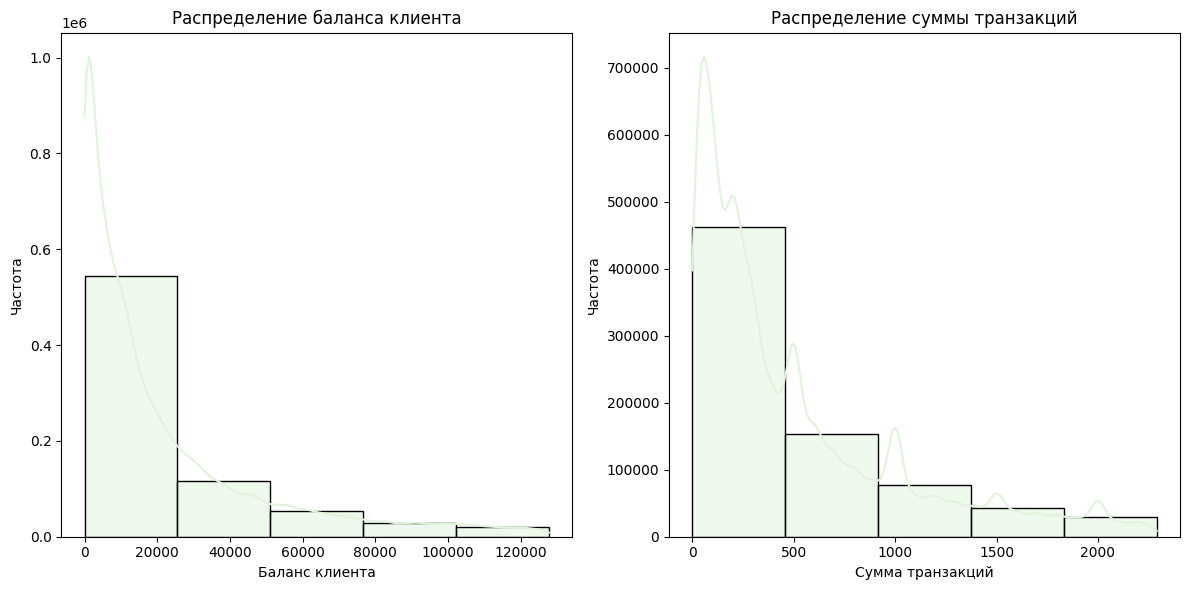

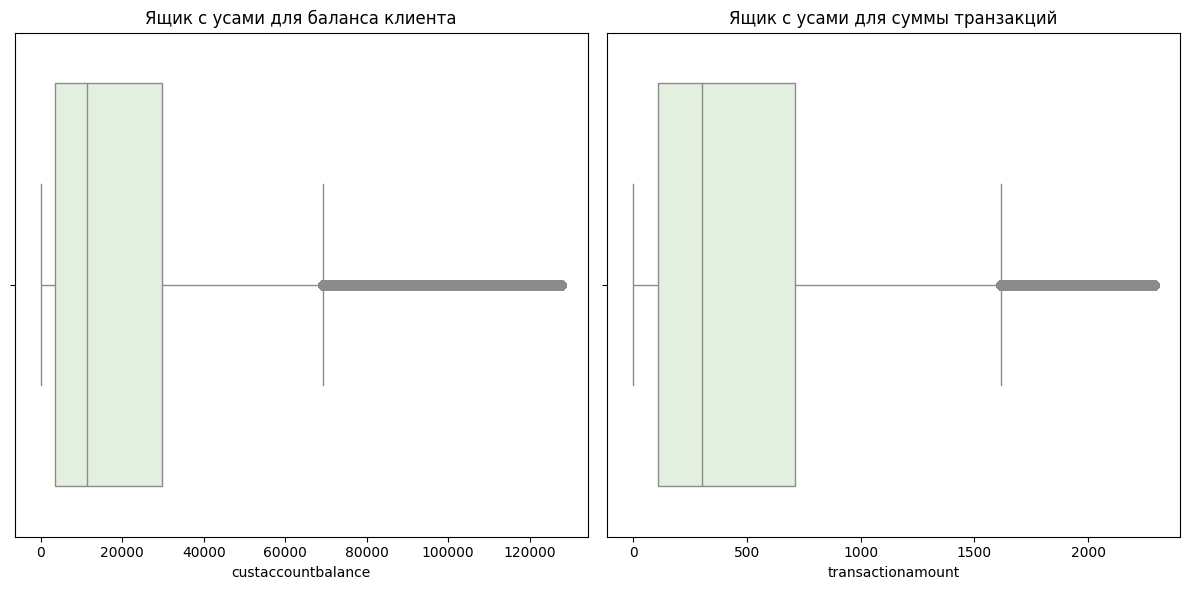

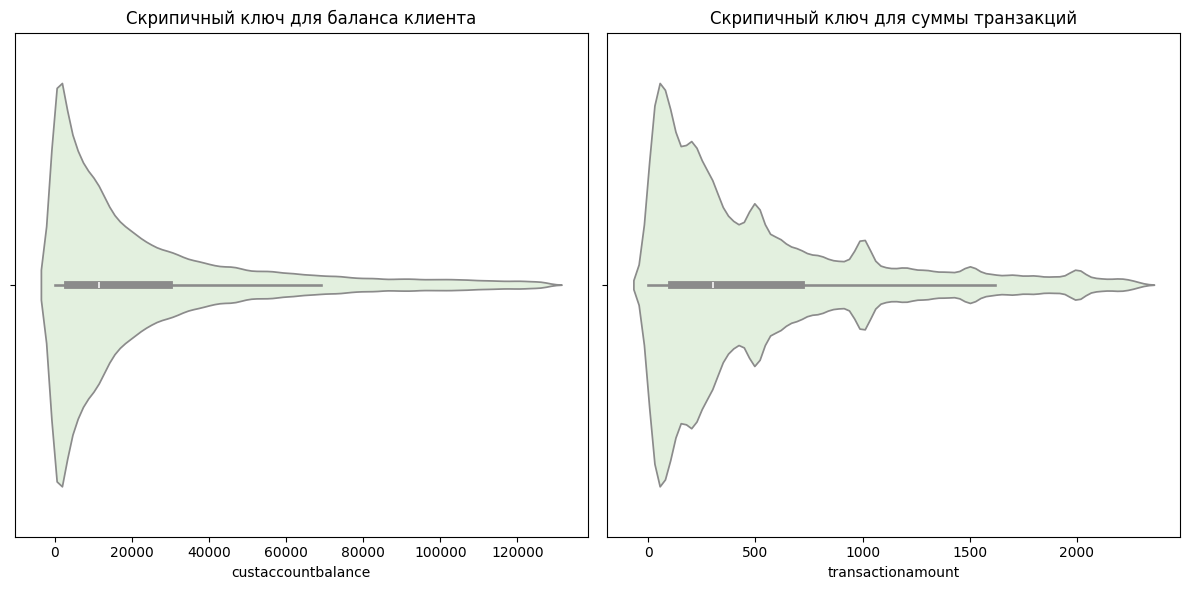

Выводы:

Для переменной 'custaccountbalance':
count    762921.000000
mean      22025.351939
std       27068.588517
min           0.010000
25%        3342.300000
50%       11389.670000
75%       29667.710000
max      127800.120000
Name: custaccountbalance, dtype: float64

Для переменной 'transactionamount':
count    762921.000000
mean        507.886932
std         522.868333
min           0.010000
25%         110.000000
50%         300.000000
75%         712.370000
max        2290.000000
Name: transactionamount, dtype: float64

1. Гистограммы показывают распределение значений с учётом плотности, что позволяет увидеть, как значения распределены по диапазону.
2. Ящики с усами дают представление о медиане, квартилях и выбросах, что важно для понимания вариации данных.
3. Скрипичные ключи показывают распределение и плотность данных, что позволяет легче увидеть, где сосредоточены значения.
4. Сравнение этих визуализаций может помочь выявить аномалии и тенденции в данных по балансам и суммам 

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Предполагается, что bnk_df уже загружен и доступен

# 1. Исследуем распределение переменных custaccountbalance и transactionamount
plt.figure(figsize=(12, 6))

# 2. Построим гистограммы
plt.subplot(1, 2, 1)
sns.histplot(bnk_df['custaccountbalance'], bins=5, kde=True)
plt.title('Распределение баланса клиента')
plt.xlabel('Баланс клиента')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.histplot(bnk_df['transactionamount'], bins=5, kde=True)
plt.title('Распределение суммы транзакций')
plt.xlabel('Сумма транзакций')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

# 3. Построим ящик с усами
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=bnk_df['custaccountbalance'])
plt.title('Ящик с усами для баланса клиента')

plt.subplot(1, 2, 2)
sns.boxplot(x=bnk_df['transactionamount'])
plt.title('Ящик с усами для суммы транзакций')

plt.tight_layout()
plt.show()

# 4. Построим скрипичный ключ
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.violinplot(x=bnk_df['custaccountbalance'])
plt.title('Скрипичный ключ для баланса клиента')

plt.subplot(1, 2, 2)
sns.violinplot(x=bnk_df['transactionamount'])
plt.title('Скрипичный ключ для суммы транзакций')

plt.tight_layout()
plt.show()

# 5. Выводы по полученным данным
balance_description = bnk_df['custaccountbalance'].describe()
transaction_description = bnk_df['transactionamount'].describe()

print("Выводы:")
print("\nДля переменной 'custaccountbalance':")
print(balance_description)
print("\nДля переменной 'transactionamount':")
print(transaction_description)

# Дополнительные выводы
print("\n1. Гистограммы показывают распределение значений с учётом плотности, что позволяет увидеть, как значения распределены по диапазону.")
print("2. Ящики с усами дают представление о медиане, квартилях и выбросах, что важно для понимания вариации данных.")
print("3. Скрипичные ключи показывают распределение и плотность данных, что позволяет легче увидеть, где сосредоточены значения.")
print("4. Сравнение этих визуализаций может помочь выявить аномалии и тенденции в данных по балансам и суммам транзакций.")


9. Проанализируй возраст клиентов. Можно посмотреть и текущее состояние клиентов, и состояние на момент совершения транзакции.

Статистика по текущему возрасту клиентов:
count    762921.000000
mean         38.209483
std           7.827984
min           1.000000
25%          33.000000
50%          36.000000
75%          41.000000
max          98.000000
Name: current_age, dtype: float64

Статистика по возрасту клиентов на момент совершения транзакции:
count    762921.000000
mean         29.544480
std           7.829503
min          -8.000000
25%          24.000000
50%          28.000000
75%          33.000000
max          89.000000
Name: age_at_transaction, dtype: float64


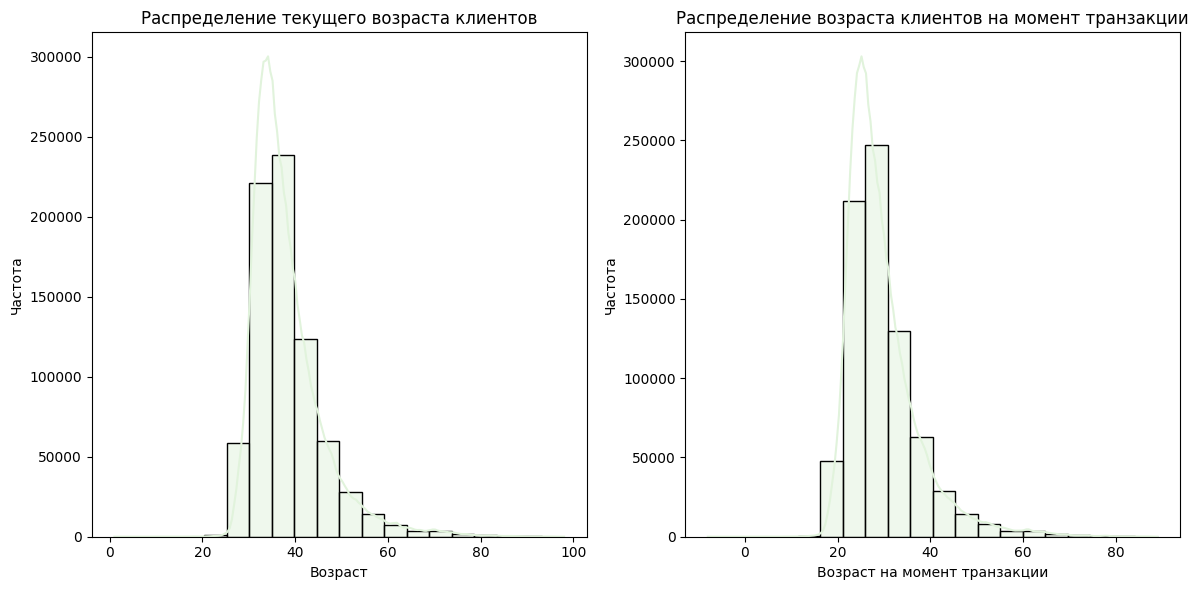

In [71]:
import pandas as pd
from datetime import datetime

# Предполагается, что bnk_df уже загружен и доступен

# 1. Преобразуем столбцы с датами в формат datetime
bnk_df['customerdob'] = pd.to_datetime(bnk_df['customerdob'])
bnk_df['transactiondate'] = pd.to_datetime(bnk_df['transactiondate'])

# 2. Рассчитаем текущий возраст клиента
current_date = datetime.now()
bnk_df['current_age'] = (current_date - bnk_df['customerdob']).dt.days // 365

# 3. Рассчитаем возраст клиента на момент совершения транзакции
bnk_df['age_at_transaction'] = (bnk_df['transactiondate'] - bnk_df['customerdob']).dt.days // 365

# 4. Выведем основные статистики по возрастам
age_statistics = {
    'current_age': bnk_df['current_age'].describe(),
    'age_at_transaction': bnk_df['age_at_transaction'].describe()
}

# 5. Вывод статистик
print("Статистика по текущему возрасту клиентов:")
print(age_statistics['current_age'])
print("\nСтатистика по возрасту клиентов на момент совершения транзакции:")
print(age_statistics['age_at_transaction'])

# 6. Визуализация распределения возрастов
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Гистограмма текущего возраста
plt.subplot(1, 2, 1)
sns.histplot(bnk_df['current_age'], bins=20, kde=True)
plt.title('Распределение текущего возраста клиентов')
plt.xlabel('Возраст')
plt.ylabel('Частота')

# Гистограмма возраста на момент транзакции
plt.subplot(1, 2, 2)
sns.histplot(bnk_df['age_at_transaction'], bins=20, kde=True)
plt.title('Распределение возраста клиентов на момент транзакции')
plt.xlabel('Возраст на момент транзакции')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

10. Изучение пол клиентов: можно построить либо гистограмму, либо круговую диаграмму, чтобы увидеть соотношение в процентном значении.

<ipython-input-72-0c36a0b94f67>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')


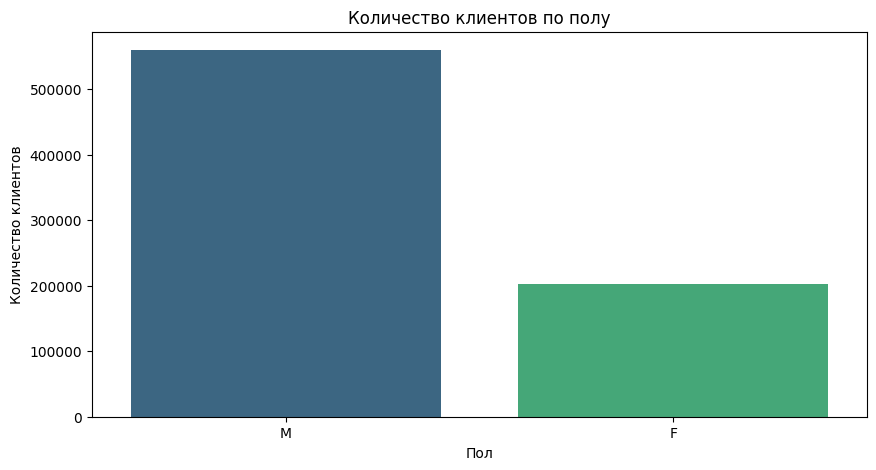

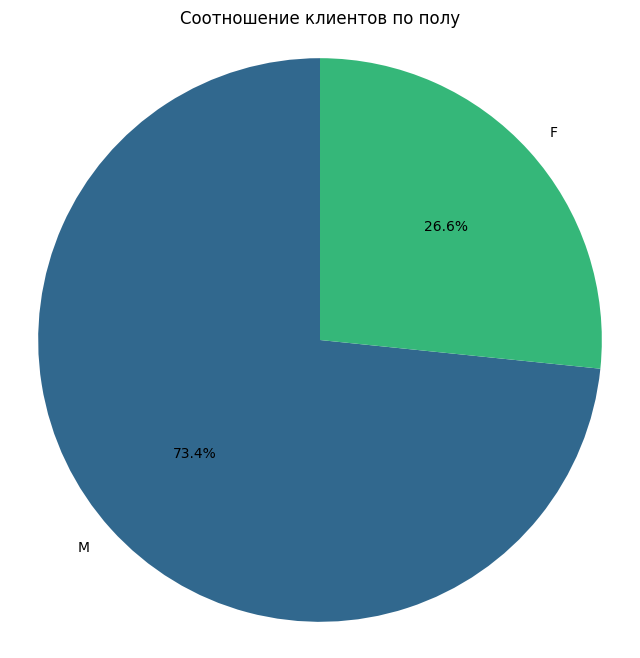

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Предположим, что ваш датафрейм уже загружен и называется bnk_df
# Пример: bnk_df = pd.read_csv('your_data_file.csv')

# Подсчет количества клиентов по полу
gender_counts = bnk_df['custgender'].value_counts()

# Построение гистограммы
plt.figure(figsize=(10, 5))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')
plt.title('Количество клиентов по полу')
plt.xlabel('Пол')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=0)
plt.show()

# Построение круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("viridis", len(gender_counts)))
plt.title('Соотношение клиентов по полу')
plt.axis('equal')  # Чтобы круг был кругом
plt.show()

11. 11. проанализируйте место жительства клиентов: на основании данных о городе проживания постройте столбчатую диаграмму, где для каждого города будет указано количество уникальных клиентов, проживающих в нем.

In [73]:
import pandas as pd

# Предполагаем, что bnk_df уже загружен

# Подсчет уникальных городов
unique_cities_count = bnk_df['custlocation'].nunique()

print(f'Клиенты проживают в {unique_cities_count} уникальных городах.')

Клиенты проживают в 7095 уникальных городах.


Клиенты проживают в 7095 уникальных городах.


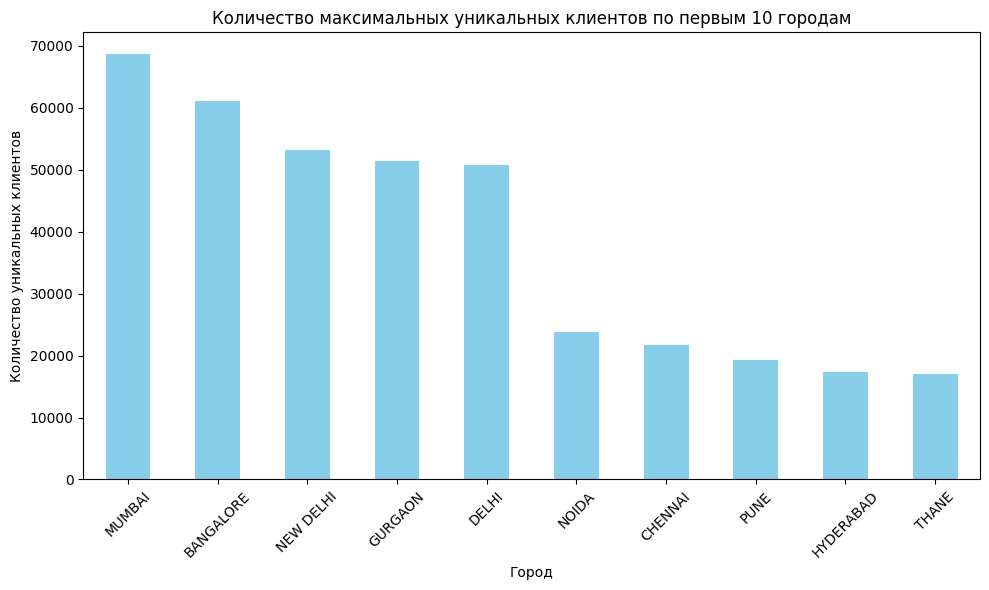

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Предполагаем, что bnk_df уже загружен

# 1. Анализируем количество уникальных городов
unique_cities = bnk_df['custlocation'].unique()

# 2. Показываем количество уникальных городов
unique_cities_count = len(unique_cities)
print(f'Клиенты проживают в {unique_cities_count} уникальных городах.')

# 3. Рассчитываем количество уникальных клиентов, проживающих в каждом городе
city_customer_counts = bnk_df.groupby('custlocation')['customerid'].nunique()

# 4. Сортируем города по количеству клиентов по убыванию
sorted_city_customer_counts = city_customer_counts.sort_values(ascending=False)

# 5. По первым 10 городам строим столбчатую диаграмму
top_10_cities = sorted_city_customer_counts.head(10)

plt.figure(figsize=(10, 6))
top_10_cities.plot(kind='bar', color='skyblue')
plt.title('Количество максимальных уникальных клиентов по первым 10 городам')
plt.xlabel('Город')
plt.ylabel('Количество уникальных клиентов')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

12. исследуй динамику транзакций по датам, сгруппировав их по дням. Если график будет слишком мелким, можно декомпозировать данные до месяца. Динамику лучше выразить линейным графиком.

<ipython-input-75-11fc9e9fd350>:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_transactions = bnk_df.resample('M', on='transactiondate')['transactionamount'].sum().reset_index()


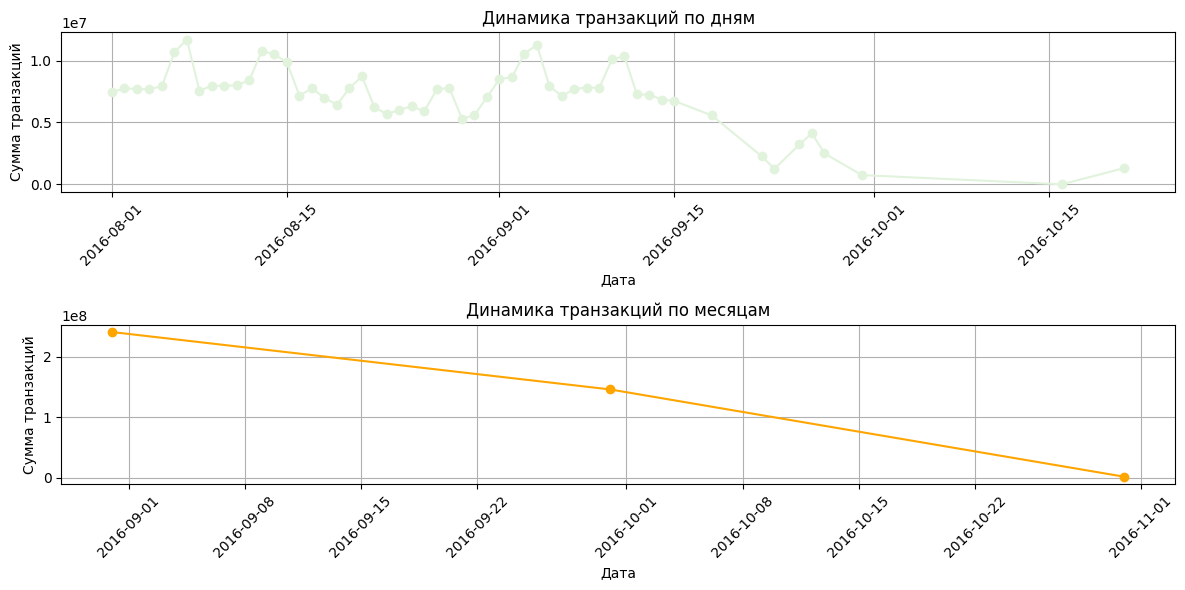

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Предполагаем, что bnk_df уже загружен

# Преобразуем столбец 'transactiondate' в datetime формат (если это еще не сделано)
bnk_df['transactiondate'] = pd.to_datetime(bnk_df['transactiondate'])

# Группируем данные по дням и суммируем 'transactionamount'
daily_transactions = bnk_df.groupby('transactiondate')['transactionamount'].sum().reset_index()

# Если данные слишком мелкие, можно агрегировать до месячного уровня
monthly_transactions = bnk_df.resample('M', on='transactiondate')['transactionamount'].sum().reset_index()

# Визуализируем данные
plt.figure(figsize=(12, 6))

# Линейный график по дням
plt.subplot(2, 1, 1)
plt.plot(daily_transactions['transactiondate'], daily_transactions['transactionamount'], marker='o')
plt.title('Динамика транзакций по дням')
plt.xlabel('Дата')
plt.ylabel('Сумма транзакций')
plt.xticks(rotation=45)
plt.grid()

# Линейный график по месяцам
plt.subplot(2, 1, 2)
plt.plot(monthly_transactions['transactiondate'], monthly_transactions['transactionamount'], marker='o', color='orange')
plt.title('Динамика транзакций по месяцам')
plt.xlabel('Дата')
plt.ylabel('Сумма транзакций')
plt.xticks(rotation=45)
plt.grid()

plt.tight_layout()  # Для улучшения компоновки графиков
plt.show()

13. проанализируй динамику в сумме продаж, сложив продажи по дням (или по месяцам), после чего также создать график и отметить закономерности, описав их в текстовой ячейке

<ipython-input-76-30cc8d21eca3>:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = bnk_df.resample('M', on='transactiondate')['transactionamount'].sum().reset_index()


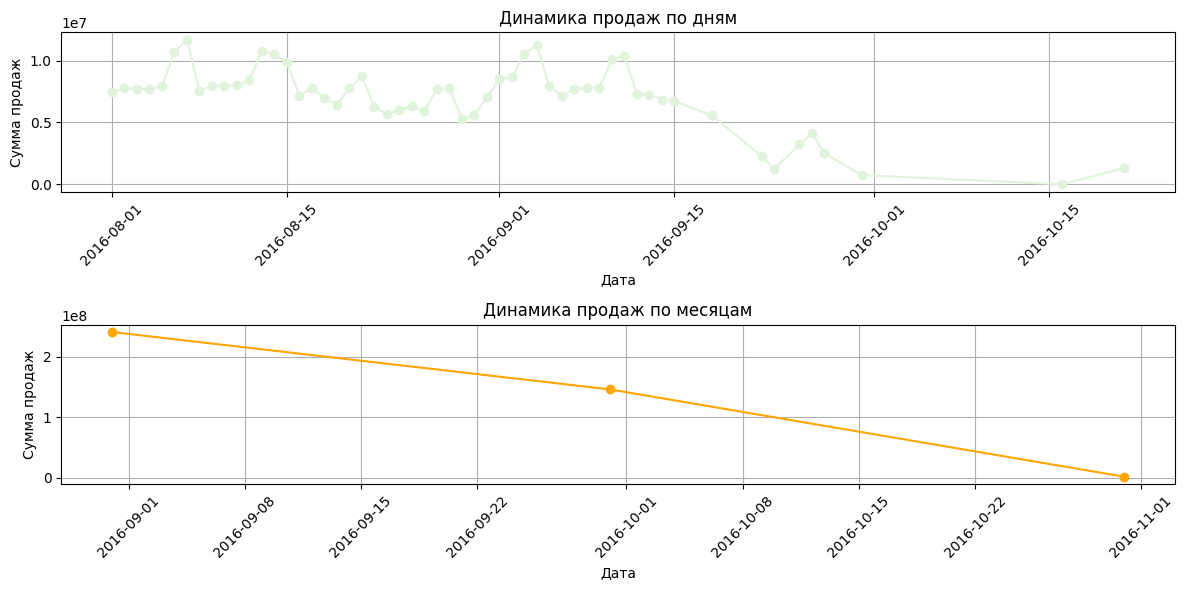

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Предполагаем, что bnk_df уже загружен

# Преобразуем столбец 'transactiondate' в datetime формат (если это еще не сделано)
bnk_df['transactiondate'] = pd.to_datetime(bnk_df['transactiondate'])

# Группируем данные по дням и суммируем 'transactionamount'
daily_sales = bnk_df.groupby('transactiondate')['transactionamount'].sum().reset_index()

# Если данные слишком мелкие, можно агрегировать до месячного уровня
monthly_sales = bnk_df.resample('M', on='transactiondate')['transactionamount'].sum().reset_index()

# Визуализируем данные
plt.figure(figsize=(12, 6))

# Линейный график по дням
plt.subplot(2, 1, 1)
plt.plot(daily_sales['transactiondate'], daily_sales['transactionamount'], marker='o')
plt.title('Динамика продаж по дням')
plt.xlabel('Дата')
plt.ylabel('Сумма продаж')
plt.xticks(rotation=45)
plt.grid()

# Линейный график по месяцам
plt.subplot(2, 1, 2)
plt.plot(monthly_sales['transactiondate'], monthly_sales['transactionamount'], marker='o', color='orange')
plt.title('Динамика продаж по месяцам')
plt.xlabel('Дата')
plt.ylabel('Сумма продаж')
plt.xticks(rotation=45)
plt.grid()

plt.tight_layout()  # Для улучшения компоновки графиков
plt.show()

14. раздели клиентов на возрастные группы с шагом в 10-15 лет и определи самую платежеспособную группу

<ipython-input-77-32042614ee9f>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = bnk_df.groupby('age_group')['transactionamount'].sum().reset_index()


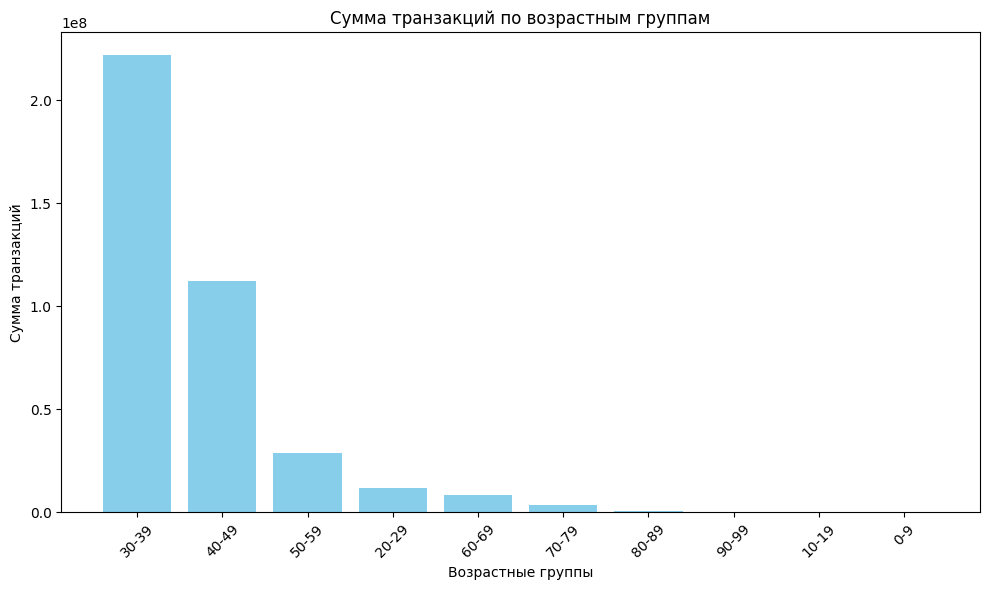

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Предположим, что ваш датафрейм bnk_df уже загружен

# 1. Определяем возраст клиентов на 2025-03-28
reference_date = pd.to_datetime('2025-03-28')
bnk_df['customerdob'] = pd.to_datetime(bnk_df['customerdob'])
bnk_df['age'] = (reference_date - bnk_df['customerdob']).dt.days // 365

# 2. Разделяем клиентов на возрастные группы с шагом в 10 лет
bins = range(0, 101, 10)  # от 0 до 100 лет с шагом 10
labels = [f"{i}-{i + 9}" for i in bins[:-1]]  # создаем метки для групп
bnk_df['age_group'] = pd.cut(bnk_df['age'], bins=bins, labels=labels, right=False)

# 3. Суммируем платежеспособность клиента (transactionamount) по возрастным группам
grouped_data = bnk_df.groupby('age_group')['transactionamount'].sum().reset_index()

# 4. Сортируем по убыванию
sorted_data = grouped_data.sort_values(by='transactionamount', ascending=False)

# 5. Строим столбчатую диаграмму
plt.figure(figsize=(10, 6))
plt.bar(sorted_data['age_group'], sorted_data['transactionamount'], color='skyblue')
plt.xlabel('Возрастные группы')
plt.ylabel('Сумма транзакций')
plt.title('Сумма транзакций по возрастным группам')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

15. посмотри распределение транзакций по локациям, чтобы узнать, из каких городов проводится больше всего транзакций


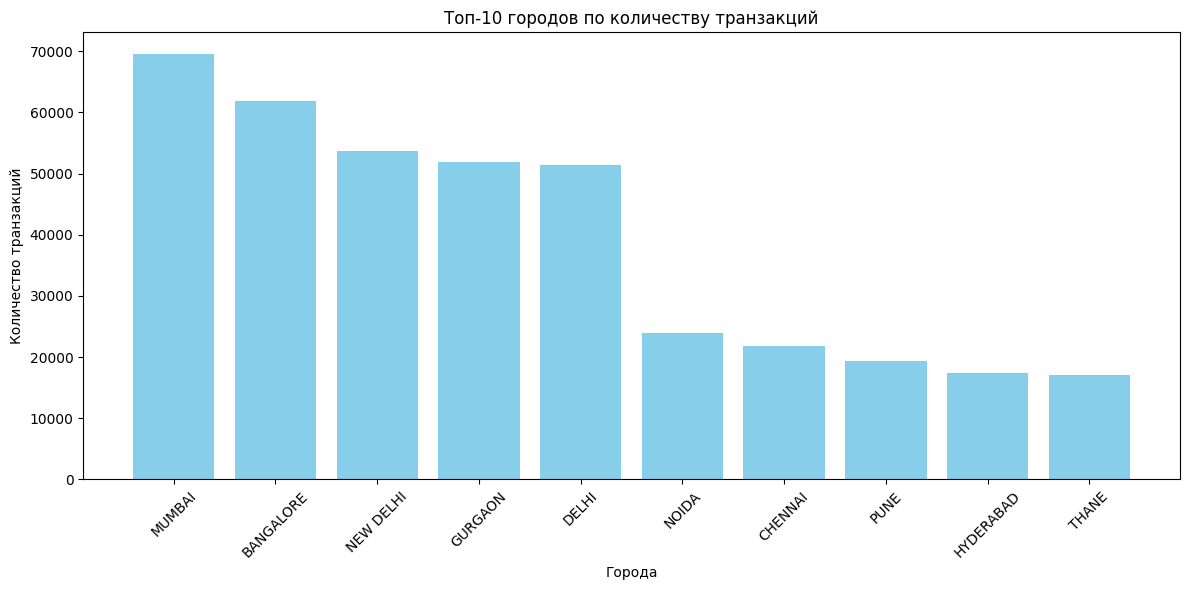

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Предполагаем, что bnk_df уже загружен

# 1. Подсчитываем общее количество транзакций клиентов по всем городам
transaction_counts = bnk_df['custlocation'].value_counts()

# 2. Сортируем по убыванию
sorted_transaction_counts = transaction_counts.sort_values(ascending=False)

# 3. Получаем топ-10 городов по количеству транзакций
top_10_cities = sorted_transaction_counts.head(10)

# 4. Строим столбчатую диаграмму
plt.figure(figsize=(12, 6))
plt.bar(top_10_cities.index, top_10_cities.values, color='skyblue')
plt.xlabel('Города')
plt.ylabel('Количество транзакций')
plt.title('Топ-10 городов по количеству транзакций')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


16. изучи распределение времени транзакций (в соответствующем поле данные содержатся в миллисекундах - эти данные нужно будет перевести в минуты и найти среднее время и распределение времени транзакций)

Среднее время транзакций в минутах: 2.62


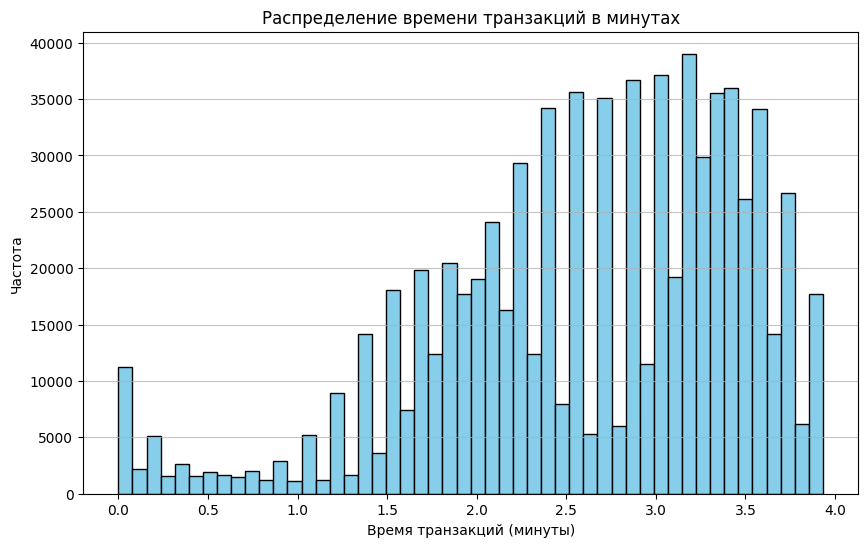

In [79]:
#import pandas as pd                       #Мы ТУТА
import pandas as pd
import matplotlib.pyplot as plt

# Предполагаем, что у вас уже загружен DataFrame bnk_df

# 1. Преобразуем transactiontime в числовой плавающий формат в секундах
bnk_df['transactiontime_seconds'] = bnk_df['transactiontime'].dt.total_seconds()

# 2. Преобразуем transactiontime в минуты
bnk_df['transactiontime_minutes'] = bnk_df['transactiontime_seconds'] / 60

# 3. Создаем новый столбец для времени в минутах (это уже сделано на предыдущем шаге)
# У нас есть столбец 'transactiontime_minutes'

# 4. Рассчитываем среднее время транзакций в минутах
average_transaction_time_minutes = bnk_df['transactiontime_minutes'].mean()

# Выводим среднее время
print(f"Среднее время транзакций в минутах: {average_transaction_time_minutes:.2f}")

# 5. Создаем гистограмму для визуализации распределения времени транзакций
plt.figure(figsize=(10, 6))
plt.hist(bnk_df['transactiontime_minutes'], bins=50, color='skyblue', edgecolor='black')
plt.title('Распределение времени транзакций в минутах')
plt.xlabel('Время транзакций (минуты)')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)
plt.show()

Среднее время транзакций: 2.67 минут


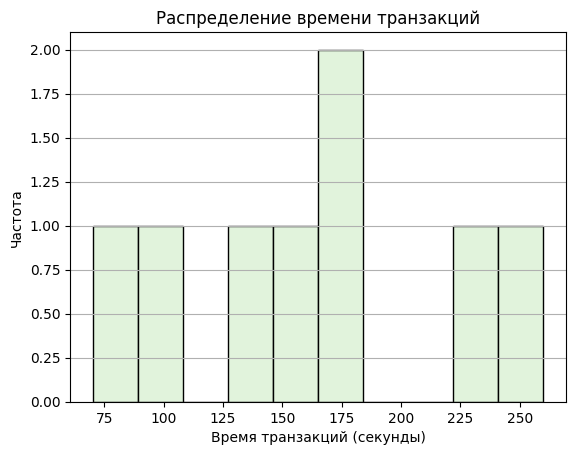

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Пример данных
data = {
    'transactiontime': ['01:30', '02:15', '03:45', '01:10', '02:50', '04:20', '03:00', '02:30']
}

# Создание DataFrame
df = pd.DataFrame(data)

# Функция для преобразования времени в секунды
def time_to_seconds(time_str):
    minutes, seconds = map(int, time_str.split(':'))
    return minutes * 60 + seconds

# Применение функции к столбцу transactiontime
df['transactiontime_seconds'] = df['transactiontime'].apply(time_to_seconds)

# Расчет среднего времени в секундах
average_time_seconds = df['transactiontime_seconds'].mean()
average_time_minutes = average_time_seconds / 60
print(f"Среднее время транзакций: {average_time_minutes:.2f} минут")

# Построение гистограммы распределения времени транзакций
plt.hist(df['transactiontime_seconds'], bins=10, edgecolor='black')
plt.title('Распределение времени транзакций')
plt.xlabel('Время транзакций (секунды)')
plt.ylabel('Частота')
plt.grid(axis='y')
plt.show()

17. Если ты хочешь усложнить исследование, можно при построении динамики исследовать динамику по категориям. Мы не знаем, где именно найдется закономерность: можно проанализировать динамику внутри городов либо динамику внутри пола, внутри корзины по возрасту и т.д.

1. Динамика внутри городов

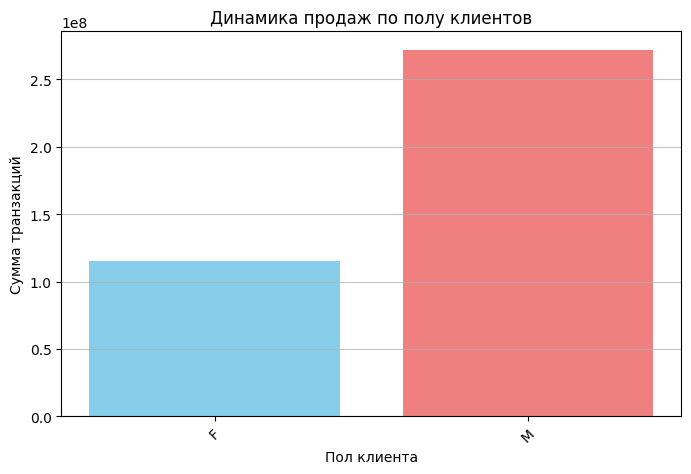

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Предполагаем, что bnk_df уже загружен и содержит необходимые данные

# Группируем данные по полу клиентов и суммируем суммы транзакций
sales_by_gender = bnk_df.groupby('custgender')['transactionamount'].sum().reset_index()

# Строим столбчатую диаграмму
plt.figure(figsize=(8, 5))
plt.bar(sales_by_gender['custgender'], sales_by_gender['transactionamount'], color=['skyblue', 'lightcoral'])
plt.title('Динамика продаж по полу клиентов')
plt.xlabel('Пол клиента')
plt.ylabel('Сумма транзакций')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)

# Показываем диаграмму
plt.show()

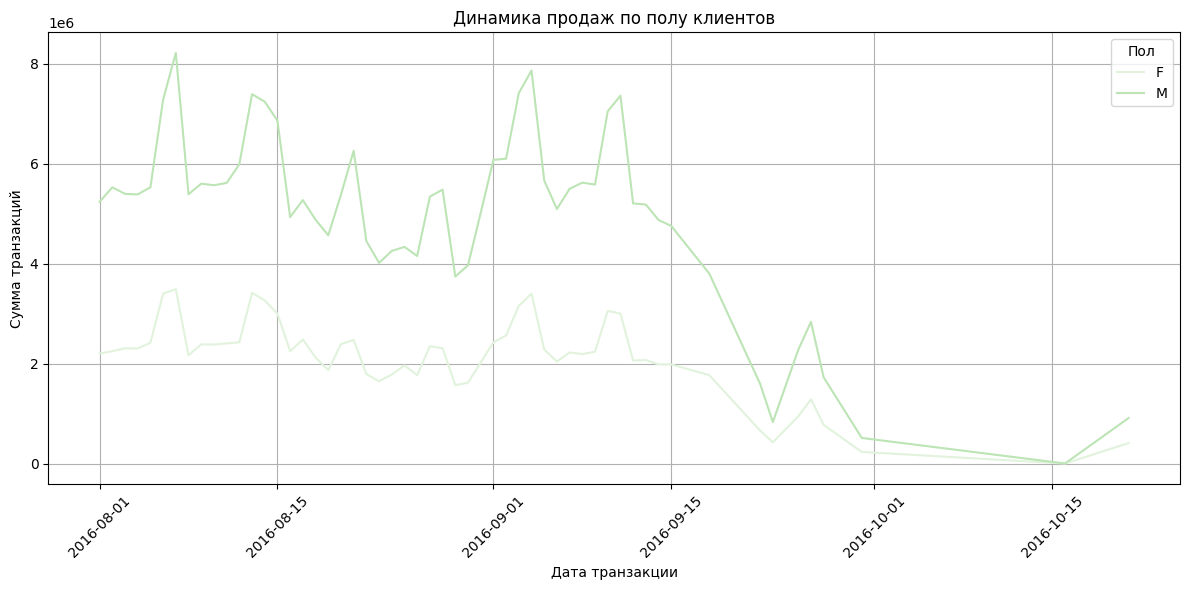

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Предполагаем, что bnk_df уже загружен и содержит необходимые данные

# Группируем данные по дате транзакции и полу, суммируя суммы транзакций
sales_by_gender = (
    bnk_df.groupby(['transactiondate', 'custgender'])['transactionamount']
    .sum()
    .unstack(fill_value=0)  # Преобразуем в формат, удобный для построения графика
)

# Строим линейный график
plt.figure(figsize=(12, 6))
for gender in sales_by_gender.columns:
    plt.plot(sales_by_gender.index, sales_by_gender[gender], label=gender)

# Настраиваем график
plt.title('Динамика продаж по полу клиентов')
plt.xlabel('Дата транзакции')
plt.ylabel('Сумма транзакций')
plt.xticks(rotation=45)
plt.legend(title='Пол')
plt.grid()

# Показываем график
plt.tight_layout()  # Для лучшего отображения
plt.show()


Выводы:

1.	Загрузили до 1048567 строк данных.
2.	Но по некоторым столбцам есть пропуски в данных.
3.	Данные в CustomerDOB и CustAccountBalance имеют короткий символьный формат данных даты.
4.	TransactionTime представлен в миллисекундах.
5.	Данные в customerdob и custAccountbalance приведены в формат данных datetime.
6.	transactiontime преобразован в формат минуты:секунды.
7.	Дата рождения клиента подкорректирована.
8.	Выполнена очистка данных:
9.	Удалены дубликаты строк;
10.	Удалены строки с пропусками в данных;
11.	Получили очищенные данные для проведения аналитики.
12.	Среднее количество транзакций на клиента: 1.1340772738894405
13.	Гистограммы показывают распределение значений с учётом плотности, что позволяет увидеть, как значения распределены по диапазону:
	Custaccountbalance от 0.010000 до 127800.120;
	Custaccountbalance от 0.010000 до 2290.000000
14.	Ящики с усами в нашем исследовании дают следующие значения о медиане, квартилях и выбросах, что важно для понимания вариации данных:
 		custaccountbalance	transactionamount
	count	762921.000000	762921.000000
	mean	22025.351939		507.886932
	min	0.010000		0.010000
	25%	3342.300000		110.000000
	50%	11389.670000		300.000000
	75%	29667.710000		712.370000
	max	127800.120000	2290.000000
	std	27068.588517		522.868333
15.	Скрипичные ключи показывают распределение и плотность данных. И на обоих скрипичных ключах визуально прослеживается, что большинство наших клиентов оперируют небольшими суммами.
16.  Самый активный возраст наших клиентов составляет от +- 30 лет до 50 лет.
17. Среди нашиз клиентов: мужчины -73.4%, женщины – 26.6%.
18. Максимальное количество наших клиентов проживают в городе MUMBAI.
19. Максимальное число транзакций наших клиентов наблюдается в возрасте от 30-39 и 40-49 лет.
20. Время транзакций большинства наших клиентов ( до почти 40000 ) составляет 3.25 минуты.
